In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
from sklearn import metrics
from sklearn.metrics import classification_report 
import xgboost as xgb
from sklearn.feature_extraction.text import HashingVectorizer
import gensim
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler,normalize
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\Maulin\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Maulin\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\Users\Maulin\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  % (host, default, e), RuntimeWarning)


In [2]:
data = pd.read_csv('train_E6oV3lV.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data.iloc[3]

id                                                       4
label                                                    0
tweet    #model   i love u take with u all the time in ...
Name: 3, dtype: object

In [4]:
print('Shape:',data.shape)
print(data.label.value_counts())

Shape: (31962, 3)
0    29720
1     2242
Name: label, dtype: int64


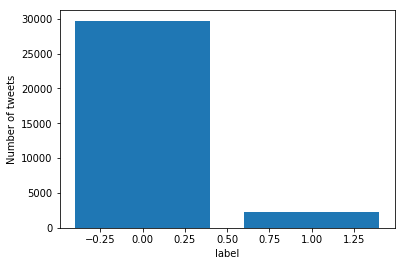

In [5]:
label_count=data.groupby('label').count()
plt.bar(label_count.index.values, label_count['tweet'])
plt.xlabel('label')
plt.ylabel('Number of tweets')
plt.show()

In [6]:
def transformation(data):   
    # upper to lower character
    data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    #punctuations
    data['tweet'] = data['tweet'].str.replace('[^\w\s]','')
    #numbers
    data['tweet'] = data['tweet'].str.replace('\d','')
    sw = stopwords.words('english')
    data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    #lemmi
    from textblob import Word
    #nltk.download('wordnet')
    data['tweet'] = data['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
    return data

In [7]:
from nltk.corpus import stopwords
data = transformation(data)
data.head()
sid = SentimentIntensityAnalyzer()
data['scores'] = data['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['comp_score'] = data['compound'].apply(lambda c: 0 if c >=0 else 1)
data.head()

,id,label,tweet,scores,compound,comp_score
0,1,0,user father dysfunctional selfish drag kid dys...,"{'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'comp...",-0.7783,1
1,2,0,user user thanks lyft credit cant use cause do...,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.6705,0
2,3,0,bihday majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
3,4,0,model love u take u time urð ðððð ððð,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,0
4,5,0,factsguide society motivation,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.3400,0


In [8]:
data['comp_score'].value_counts()

0    25467
1     6495
Name: comp_score, dtype: int64

In [9]:
data['scores'][0:5]

0    {'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'comp...
1    {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
4    {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...
Name: scores, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['id','tweet','comp_score']], data['label'], test_size=0.2, random_state=42)
X_test.shape,X_train.shape

((6393, 3), (25569, 3))

# Count Vectorizer

In [11]:
countvec = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=3)
X_train_countvec = countvec.fit_transform(X_train['tweet'])
len(countvec.get_feature_names())
X_train_countvec = pd.DataFrame(X_train_countvec.toarray())
X_train_countvec.shape

(25569, 13118)

In [12]:
countvec.get_feature_names()

['_animaladvocate',
 'aaa',
 'aampe',
 'aap',
 'aap congress',
 'aap spokesperson',
 'aaps',
 'aaps claim',
 'aaron',
 'ab',
 'abandoned',
 'abc',
 'ability',
 'able',
 'able learn',
 'able sleep',
 'ableg',
 'aboion',
 'abrahamhicks',
 'abrahamhicks lawofattraction',
 'abroad',
 'absolute',
 'absolutely',
 'abstract',
 'abstracta',
 'absurd',
 'abt',
 'abundance',
 'abuse',
 'abuse claim',
 'abusive',
 'ac',
 'academy',
 'acc',
 'acc user',
 'accent',
 'accent feeling',
 'accept',
 'accept role',
 'accept stopracism',
 'acceptable',
 'acceptance',
 'accepted',
 'accepted user',
 'accepting',
 'access',
 'accessory',
 'accident',
 'accidentally',
 'according',
 'account',
 'account user',
 'accountable',
 'accusation',
 'accuse',
 'ace',
 'ache',
 'achieve',
 'achieve goal',
 'achieved',
 'achievement',
 'achievement nda',
 'aching',
 'acne',
 'acne altwaystoheal',
 'acoustic',
 'acquired',
 'acre',
 'act',
 'act like',
 'act violence',
 'acting',
 'acting like',
 'action',
 'action ma

In [13]:
X_test_countvec = countvec.transform(X_test['tweet'])
X_test_countvec.shape

(6393, 13118)

## Naive Bayes

In [14]:
nbmodelcountvec = MultinomialNB(alpha=0.1)
nbmodelcountvec.fit(X_train_countvec,y_train)
pred_nb_countvec = nbmodelcountvec.predict(X_test_countvec)
nb_countvec_score = nbmodelcountvec.score(X_test_countvec,y_test)
print(nb_countvec_score)
print(metrics.confusion_matrix(y_test,pred_nb_countvec))
print('classification report===============')
print(classification_report(y_test,pred_nb_countvec))
print('f1 score:',f1_score(y_test,pred_nb_countvec))

0.9499452526200531
[[5758  179]
 [ 141  315]]
classification report===============
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5937
           1       0.64      0.69      0.66       456

    accuracy                           0.95      6393
   macro avg       0.81      0.83      0.82      6393
weighted avg       0.95      0.95      0.95      6393

f1 score: 0.6631578947368422


## Logistic Regression

In [15]:
lrmodel = LogisticRegression(class_weight='balanced')
lrmodel.fit(X_train_countvec,y_train)
pred_lr = lrmodel.predict(X_test_countvec)
score = lrmodel.score(X_test_countvec, y_test)
print(score)
print('f1 score',f1_score(pred_lr,y_test))

0.9408728296574378
f1 score 0.6440677966101693


In [14]:
train_pred=lrmodel.predict(X_train_countvec)
score = lrmodel.score(X_train_countvec, y_train)
print(score)
print('f1 score',f1_score(train_pred,y_train))

0.9779420391880793
f1 score 0.862371888726208


## SGD Classifier with hinge loss

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   24.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   29.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   33.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   33.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


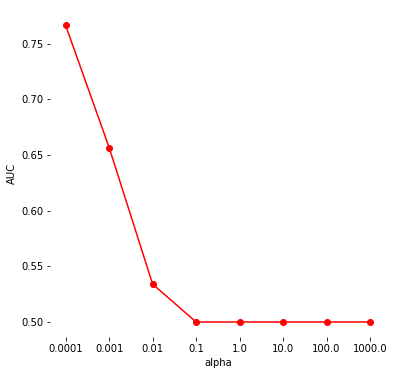

SGDClassifier(n_iter_no_change=1000, n_jobs=-1) 0.7662855819437426


In [31]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter_no_change': [1000], # number of epochs
    'loss': ['hinge'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train_countvec, y_train, X_test_countvec, y_test, 
           metric = roc_auc_score, 
           scoreLabel = "AUC")

print(bestModel, bestScore)

In [32]:
pred_y_hinge = bestModel.predict(X_test_countvec)
print(f1_score(pred_y_hinge,y_test))

0.6525759577278732


## SGD with logg loss

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   38.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   45.1s remaining:    0.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   51.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   51.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


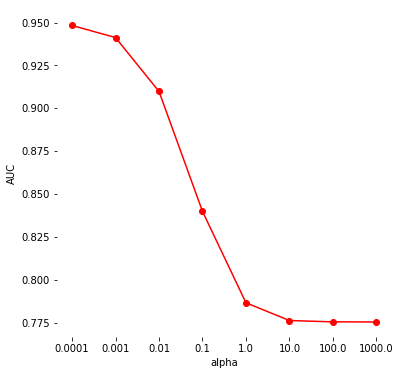

SGDClassifier(class_weight='balanced', loss='log', n_iter_no_change=1000,
              n_jobs=-1) 0.9483225180181378


In [33]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter_no_change': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1],
    'class_weight': ['balanced']
}
paramGrid = ParameterGrid(grid)

bestModel_log, bestScore_log, allModels_log, allScores_log = pf.bestFit(SGDClassifier, paramGrid,
           X_train_countvec, y_train, X_test_countvec, y_test, 
           metric = roc_auc_score, 
           scoreLabel = "AUC")

print(bestModel_log, bestScore_log)

In [34]:
pred_y_log = bestModel_log.predict(X_test_countvec)
print(f1_score(pred_y_log,y_test))

0.6321428571428572


## XG boost

In [34]:
xgmodelcountvec = xgb.XGBClassifier(scale_pos_weight=2)
xgmodelcountvec.fit(X_train_countvec,y_train)
pred_xg_countvec = xgmodelcountvec.predict(X_test_countvec)
xg_countvec_score = xgmodelcountvec.score(X_test_countvec,y_test)
print(xg_countvec_score)
print(metrics.confusion_matrix(y_test,pred_xg_countvec))
print('classification report===============')
print(classification_report(y_test,pred_xg_countvec))
print('f1 score:',f1_score(y_test,pred_xg_countvec))

0.9536993586735492
[[5884   53]
 [ 243  213]]
classification report===============
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.80      0.47      0.59       456

   micro avg       0.95      0.95      0.95      6393
   macro avg       0.88      0.73      0.78      6393
weighted avg       0.95      0.95      0.95      6393

f1 score: 0.590027700831025


## RandomForestClassifier

In [52]:
rfmodelcountvec = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfmodelcountvec.fit(X_train_countvec,y_train)
pred_rf_countvec = rfmodelcountvec.predict(X_test_countvec)
rf_countvec_score = rfmodelcountvec.score(X_test_countvec,y_test)
print(rf_countvec_score)
print(metrics.confusion_matrix(y_test,pred_rf_countvec))
print('classification report===============')
print(classification_report(y_test,pred_rf_countvec))
print('f1 score:',f1_score(y_test,pred_rf_countvec))

0.9569842014703582
[[5888   49]
 [ 226  230]]
classification report===============
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.82      0.50      0.63       456

   micro avg       0.96      0.96      0.96      6393
   macro avg       0.89      0.75      0.80      6393
weighted avg       0.95      0.96      0.95      6393

f1 score: 0.6258503401360543


## RandomForest with Random UnderSampling

In [ ]:
# rfblmodelcountvec = BalancedRandomForestClassifier(n_estimators=100,class_weight='balanced')
# rfmodelcountvec.fit(X_train_countvec,y_train)
# pred_rf_countvec = rfmodelcountvec.predict(X_test_countvec)
# rf_countvec_score = rfmodelcountvec.score(X_test_countvec,y_test)
# print(rf_countvec_score)
# print(metrics.confusion_matrix(y_test,pred_rf_countvec))
# print('classification report===============')
# print(classification_report(y_test,pred_rf_countvec))
# print('f1 score:',f1_score(y_test,pred_rf_countvec))

# TFIDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['tweet'])
X_test_tfidf = vectorizer.transform(X_test['tweet'])

## Naive Bayes

In [34]:
nbmodeltfidf = MultinomialNB(alpha=0.01)
nbmodeltfidf.fit(X_train_tfidf,y_train)
pred_nb_tfidf = nbmodeltfidf.predict(X_test_tfidf)
nb_tfidf_score = nbmodeltfidf.score(X_test_tfidf,y_test)
print(nb_tfidf_score)
print(metrics.confusion_matrix(y_test,pred_nb_tfidf))
print('classification report===============')
print(classification_report(y_test,pred_nb_tfidf))
print('f1 score:',f1_score(y_test,pred_nb_tfidf))

0.9613639918661036
[[5897   40]
 [ 207  249]]
classification report===============
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5937
           1       0.86      0.55      0.67       456

    accuracy                           0.96      6393
   macro avg       0.91      0.77      0.82      6393
weighted avg       0.96      0.96      0.96      6393

f1 score: 0.668456375838926


## Logistic Regression

In [61]:
lrmodeltfidf = LogisticRegression(class_weight='balanced')
lrmodeltfidf.fit(X_train_tfidf,y_train)
pred_lr_tfidf = lrmodeltfidf.predict(X_test_tfidf)
lr_tfidf_score = lrmodeltfidf.score(X_test_tfidf, y_test)
print(lr_tfidf_score)
print(metrics.confusion_matrix(y_test,pred_lr_tfidf))
print('classification report===============')
print(classification_report(y_test,pred_lr_tfidf))
print('f1 score:',f1_score(y_test,pred_lr_tfidf))

C:\Users\Maulin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9366494603472548
[[5623  314]
 [  91  365]]
classification report===============
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5937
           1       0.54      0.80      0.64       456

   micro avg       0.94      0.94      0.94      6393
   macro avg       0.76      0.87      0.80      6393
weighted avg       0.95      0.94      0.94      6393

f1 score: 0.6431718061674009


## XG Boost

In [62]:
xgmodeltfidf = xgb.XGBClassifier(scale_pos_weight=2)
xgmodeltfidf.fit(X_train_tfidf,y_train)
pred_xg_tfidf = xgmodeltfidf.predict(X_test_tfidf)
xg_tfidf_score = xgmodeltfidf.score(X_test_tfidf,y_test)
print(xg_tfidf_score)
print(metrics.confusion_matrix(y_test,pred_xg_tfidf))
print('classification report===============')
print(classification_report(y_test,pred_xg_tfidf))
print('f1 score:',f1_score(y_test,pred_xg_tfidf))

0.9522915689034882
[[5868   69]
 [ 236  220]]
classification report===============
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5937
           1       0.76      0.48      0.59       456

   micro avg       0.95      0.95      0.95      6393
   macro avg       0.86      0.74      0.78      6393
weighted avg       0.95      0.95      0.95      6393

f1 score: 0.5906040268456375


## SGD Classifier with Hinge Loss

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   21.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   35.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   41.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   47.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   47.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


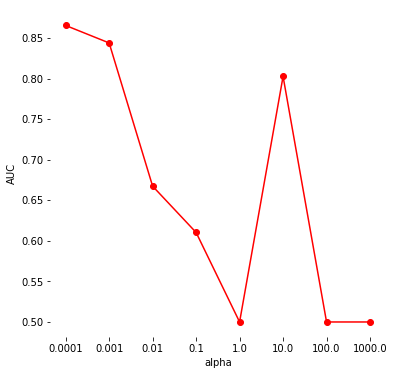

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False) 0.8658435502601881


In [69]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['hinge'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1],
    'class_weight': ['balanced']
}
paramGrid = ParameterGrid(grid)

bestModel_hinge_tfidf, bestScore_hinge_tfidf, allModels_hinge_tfidf, allScores_hinge_tfidf = pf.bestFit(SGDClassifier, paramGrid,
           X_train_tfidf, y_train, X_test_tfidf, y_test, 
           metric = roc_auc_score, 
           scoreLabel = "AUC")

print(bestModel_hinge_tfidf, bestScore_hinge_tfidf)

In [70]:
pred_y_hinge_tfidf = bestModel_hinge_tfidf.predict(X_test_tfidf)
print(f1_score(pred_y_hinge_tfidf,y_test))

0.6455122393472349


## SGD Classifier with Log Loss

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   49.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   58.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


-------------SCORING MODELS-------------


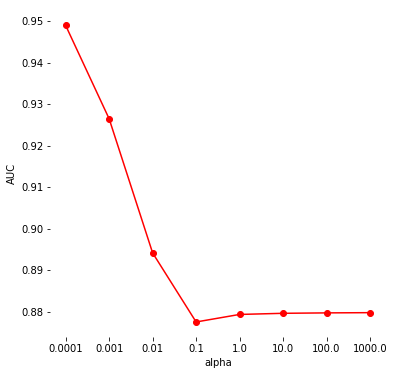

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False) 0.6840437532689733


In [67]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1],
    'class_weight': ['balanced']
}
paramGrid = ParameterGrid(grid)

bestModel_log_tfidf, bestScore_log_tfidf, allModels_log_tfidf, allScores_log_tfidf = pf.bestFit(SGDClassifier, paramGrid,
           X_train_tfidf, y_train, X_test_tfidf, y_test, 
           metric = roc_auc_score, 
           scoreLabel = "AUC")

print(bestModel_hinge_tfidf, bestScore_hinge_tfidf)

In [68]:
pred_y_log_tfidf = bestModel_log_tfidf.predict(X_test_tfidf)
print(f1_score(pred_y_log_tfidf,y_test))

0.6119402985074628


## RandomForest Classifier

In [81]:
rfmodeltfidf = RandomForestClassifier(n_estimators=100)
rfmodeltfidf.fit(X_train_tfidf,y_train)
pred_rf_tfidf = rfmodeltfidf.predict(X_test_tfidf)
rf_tfidf_score = rfmodeltfidf.score(X_test_tfidf,y_test)
print(rf_tfidf_score)
print(metrics.confusion_matrix(y_test,pred_rf_tfidf))
print('classification report===============')
print(classification_report(y_test,pred_rf_tfidf))
print('f1 score:',f1_score(y_test,pred_rf_tfidf))

0.9577663068981699
[[5907   30]
 [ 240  216]]
classification report===============
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.88      0.47      0.62       456

   micro avg       0.96      0.96      0.96      6393
   macro avg       0.92      0.73      0.80      6393
weighted avg       0.96      0.96      0.95      6393

f1 score: 0.6153846153846154


In [50]:
hashing_vectorizer = HashingVectorizer(n_features=20)
X_train_hashing = hashing_vectorizer.transform(X_train['tweet'])
X_test_hashing = hashing_vectorizer.transform(X_test['tweet'])
X_train_hashing = pd.DataFrame(X_train_hashing.toarray())
X_train_hashing.head()

# sc = StandardScaler()
# X_train_hashing=sc.fit_transform(X_train_hashing)
# X_test_hashing=sc.transform(X_test_hashing.toarray())


X_train_hashing[0:5]

array([[-0.10573527,  0.07925129, -0.08685611, -0.02353688,  1.2554559 ,
         0.01326242,  0.02767199,  0.08519252, -0.14622966, -0.02743277,
         0.08384656, -1.03722934,  2.03322141, -0.00751092, -1.28546178,
        -1.68924544, -0.05579465, -1.32732634, -0.09022491,  1.04973921],
       [-1.49062228, -1.16652778, -1.54123215, -0.02353688, -1.30066843,
         0.01326242, -1.33261323,  0.08519252,  1.11122729, -0.02743277,
         0.08384656,  0.05140989, -1.03829018, -0.00751092, -0.10055154,
        -1.27474064, -0.05579465, -0.04429137,  1.46863544,  0.13802894],
       [ 1.41133244,  0.07925129, -0.08685611,  1.5290445 ,  0.10650423,
         0.01326242,  0.02767199,  0.08519252, -0.14622966, -0.02743277,
        -1.45528558,  0.05140989, -1.14963144,  3.00453766,  1.48917236,
         0.56959425, -1.61497852, -0.04429137, -0.09022491,  0.13802894],
       [-0.10573527,  0.07925129, -0.08685611, -0.02353688,  0.10650423,
         0.01326242,  0.02767199,  0.08519252, -

In [52]:
nbmodelhashing = MultinomialNB()
nbmodelhashing.fit(X_train_hashing,y_train)
pred_nb_hashing = nbmodelhashing.predict(X_test_hashing)
nb_hashing_score = nbmodelhashing.score(X_test_hashing, y_test)
print(nb_hashing_score)
print(metrics.confusion_matrix(y_test,pred_nb_hashing))
print('classification report===============')
print(classification_report(y_test,pred_nb_hashing))
print('f1 score:',f1_score(y_test,pred_nb_hashing))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [51]:
lrmodelhashing = LogisticRegression(class_weight='balanced')
lrmodelhashing.fit(X_train_hashing,y_train)
pred_lr_hashing = lrmodelhashing.predict(X_test_hashing)
lr_hashing_score = lrmodelhashing.score(X_test_hashing, y_test)
print(lr_hashing_score)
print(metrics.confusion_matrix(y_test,pred_lr_hashing))
print('classification report===============')
print(classification_report(y_test,pred_lr_hashing))
print('f1 score:',f1_score(y_test,pred_lr_hashing))

0.6023776005005474
[[3558 2379]
 [ 163  293]]
classification report===============
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      5937
           1       0.11      0.64      0.19       456

    accuracy                           0.60      6393
   macro avg       0.53      0.62      0.46      6393
weighted avg       0.90      0.60      0.70      6393

f1 score: 0.18734015345268545


In [86]:
xgmodelhashing = xgb.XGBClassifier(scale_pos_weight=2)
xgmodelhashing.fit(X_train_hashing,y_train)
pred_xg_hashing = xgmodelhashing.predict(X_test_hashing)
xg_hashing_score = xgmodelhashing.score(X_test_hashing,y_test)
print(xg_hashing_score)
print(metrics.confusion_matrix(y_test,pred_xg_hashing))
print('classification report===============')
print(classification_report(y_test,pred_xg_hashing))
print('f1 score:',f1_score(y_test,pred_xg_hashing))

0.9319568277803848
[[5888   49]
 [ 386   70]]
classification report===============
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5937
           1       0.59      0.15      0.24       456

   micro avg       0.93      0.93      0.93      6393
   macro avg       0.76      0.57      0.60      6393
weighted avg       0.91      0.93      0.91      6393

f1 score: 0.24347826086956523


In [87]:
def corpus_split(data):
    #snow = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    list_of_sent=[]
    for sent in data:
        filtered_sent=[]
        for w in sent.split():
            w=w.lower()
            if w not in stop_words:
                #w=snow.stem(w)
                w=lemmatizer.lemmatize(w)
                for cleaned_words in w.split():
                        if(cleaned_words.isalpha()):
                            filtered_sent.append(cleaned_words.lower())
                        else:
                            continue
        list_of_sent.append(list(set(filtered_sent)))
    return list_of_sent
corpus_split(X_train['tweet'])

[['attention', 'user', 'â', 'ive', 'year', 'paying', 'past'],
 ['raft',
  'outdoors',
  'user',
  'gmw',
  'badge',
  'quay',
  'salford',
  'building',
  'pa',
  'fun',
  'guide'],
 ['gaystyle',
  'selfie',
  'gayguy',
  'gdegblog',
  'fullnessâ',
  'ð',
  'friday',
  'beard',
  'gaymen',
  'lifestyle'],
 ['fact', 'fashion', 'true'],
 ['share',
  'jewelry',
  'businesscards',
  'muse',
  'elegant',
  'simple',
  'designed',
  'gracious'],
 ['european',
  'big',
  'colne',
  'uk',
  'user',
  'bet',
  'blue',
  'event',
  'blueshour',
  'anniversary',
  'monday',
  'th',
  'update'],
 ['paxex',
  'minute',
  'fix',
  'print',
  'translate',
  'google',
  'nonsense',
  'five',
  'would',
  'sign'],
 ['let',
  'compete',
  'ampdisappointed',
  'guccifer',
  'going',
  'equally',
  'according',
  'u',
  'dnc',
  'berniesanders',
  'never'],
 ['love',
  'happy',
  'one',
  'life',
  'thing',
  'mysonshine',
  'smile',
  'simple',
  'photography',
  'make'],
 ['torv', 'whoolo', 'anna', 'sad

In [88]:
w2v_model=gensim.models.Word2Vec(corpus_split(X_train['tweet']),min_count=1,size=50,workers=4)

In [89]:
words=list(w2v_model.wv.vocab)
words
# print(len(words))
# print(pd.Series(words).nunique())

['attention',
 'user',
 'â',
 'ive',
 'year',
 'paying',
 'past',
 'raft',
 'outdoors',
 'gmw',
 'badge',
 'quay',
 'salford',
 'building',
 'pa',
 'fun',
 'guide',
 'gaystyle',
 'selfie',
 'gayguy',
 'gdegblog',
 'fullnessâ',
 'ð',
 'friday',
 'beard',
 'gaymen',
 'lifestyle',
 'fact',
 'fashion',
 'true',
 'share',
 'jewelry',
 'businesscards',
 'muse',
 'elegant',
 'simple',
 'designed',
 'gracious',
 'european',
 'big',
 'colne',
 'uk',
 'bet',
 'blue',
 'event',
 'blueshour',
 'anniversary',
 'monday',
 'th',
 'update',
 'paxex',
 'minute',
 'fix',
 'print',
 'translate',
 'google',
 'nonsense',
 'five',
 'would',
 'sign',
 'let',
 'compete',
 'ampdisappointed',
 'guccifer',
 'going',
 'equally',
 'according',
 'u',
 'dnc',
 'berniesanders',
 'never',
 'love',
 'happy',
 'one',
 'life',
 'thing',
 'mysonshine',
 'smile',
 'photography',
 'make',
 'torv',
 'whoolo',
 'anna',
 'sad',
 'ending',
 'film',
 'friend',
 'way',
 'fellaindias',
 'youngsweet',
 'feel',
 'black',
 'listen',


In [25]:
# def w2v_sen1(lst_of_sent,w2v_model):
#     tfidf_sent_vectors=[]
#     row=0
#     for sent in lst_of_sent:                                           #for each comment
#         sent_vec=np.zeros(50)                                          #as word vectors are of zero length
#         weighted_sum=0                                                    #number of wordswith a valid vector in the comment
#         for word in sent:                                              #for each word in comment
#             try:
#                 vec=w2v_model.wv[word]
#                 tf_idf=final_tf_idf[row,tf_idf_feat.index(word)]
                
#                 sent_vec += (vec*tf_idf)
#                 weighted_sum += tf_idf
#             except:
#                 pass
#         sent_vec /= weighted_sum
#         tfidf_sent_vectors.append(sent_vec)
#         row+=1
#     return tfidf_sent_vectors

# def w2v_simle(data,model):
#     sent_vectors=[]
#     for sent in data:                                           #for each comment
#         sent_vec=np.zeros(50)                                          #as word vectors are of zero length
#         cnt_words=0                                                    #number of wordswith a valid vector in the comment
#         for word in sent:                                              #for each word in comment
#             try:
#                 vec=w2v_model.wv[word]
#                 sent_vec += vec
#                 cnt_words += 1
#             except:
#                 pass
#         sent_vec /= cnt_words
#         sent_vectors.append(sent_vec)
# w2v_sen1(corpus_split(X_train['tweet']),w2v_model)
# sent_vectors_train = w2v_simle(X_train['tweet'],w2v_model)
# sent_vectors_test = w2v_simle(X_test['tweet'],w2v_model)
# sent_vectors_train

In [90]:
sent_vectors=[]
for sent in X_train['tweet']:                                           #for each comment
        sent_vec=np.zeros(50)                                          #as word vectors are of zero length
        cnt_words=0                                                    #number of wordswith a valid vector in the comment
        for word in sent:                                              #for each word in comment
            try:
                vec=w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except:
                pass
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
sent_vectors

C:\Users\Maulin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


[array([-3.66834642e-01, -5.88378306e-01, -4.51507804e-01, -8.86106857e-01,
         4.08338683e-02, -2.75597665e-02,  6.16741924e-01, -5.39594679e-01,
         8.89457821e-01,  8.73291173e-01,  1.68735186e-01, -5.48476982e-02,
         6.18907360e-01,  2.52823240e-01, -6.45167629e-01, -7.19977287e-01,
        -5.10912879e-01, -1.35577147e+00,  9.47934287e-02, -5.28582113e-01,
         6.46853684e-01,  1.33670821e+00,  1.38135054e-01, -2.17080750e-02,
        -1.24432366e-03, -6.26306240e-02, -1.67717219e+00, -3.61107464e-01,
        -6.40778441e-01, -1.11396641e+00,  1.56086968e+00, -2.92444624e-01,
        -1.60601746e-01,  1.42199015e+00, -1.84987198e-01, -1.38061595e-02,
         4.51838949e-01, -7.71651117e-01, -4.36878995e-02,  9.06861278e-01,
        -8.06088445e-01,  5.19118473e-01, -1.40871637e-01,  8.88793024e-01,
        -8.99895733e-02, -4.14706767e-01,  6.72819763e-02, -3.03349674e-01,
         7.24540041e-01, -2.32086788e-01]),
 array([-2.79255546e-01, -5.27631590e-01, -3

In [92]:
vec_df_train=pd.DataFrame(sent_vectors)
# vec_df_test=pd.DataFrame(sent_vectors_test)
# vec_df.head()
vec_df_train.interpolate(inplace=True)
vec_df_train.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [104]:
lrmodelw2v = LogisticRegression(C=10,class_weight='balanced')
lrmodelw2v.fit(vec_df_train,y_train)
pred_lr_w2v = lrmodelw2v.predict(vec_df_train)
lr_w2v_score = lrmodelw2v.score(vec_df_train, y_train)
print(lr_w2v_score)
print(metrics.confusion_matrix(y_train,pred_lr_w2v))
print('classification report===============')
print(classification_report(y_train,pred_lr_w2v))
print('f1 score:',f1_score(y_train,pred_lr_w2v))

C:\Users\Maulin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6275568070710627
[[14742  9041]
 [  482  1304]]
classification report===============
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     23783
           1       0.13      0.73      0.21      1786

   micro avg       0.63      0.63      0.63     25569
   macro avg       0.55      0.67      0.49     25569
weighted avg       0.91      0.63      0.72     25569

f1 score: 0.2149863984832248
